In [ ]:
import os

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

from keras_tuner.tuners import RandomSearch

%matplotlib inline

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace=True)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

print('df_train shape: ',df_train.shape)
print('df_test shape: ',df_test.shape)

df_train shape:  (8000, 11)
df_test shape:  (2000, 11)


In [ ]:
X_train = df_train.drop(['Exited'],axis=1)
y_train = df_train['Exited']

X_test = df_test.drop(['Exited'],axis=1)
y_test = df_test['Exited']

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (8000, 10)
y_train shape:  (8000,)
X_test shape:  (2000, 10)
y_test shape:  (2000,)


In [ ]:
enc = OneHotEncoder(handle_unknown= 'ignore')
enc.fit(X_train)

X_train = enc.transform(X_train)
X_test = enc.transform(X_test)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (8000, 13629)
y_train shape:  (8000,)
X_test shape:  (2000, 13629)
y_test shape:  (2000,)


In [ ]:
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (8000, 13629)
y_train shape:  (8000,)
X_test shape:  (2000, 13629)
y_test shape:  (2000,)


In [ ]:
pca = PCA(n_components=50)
pca.fit(X_train.toarray())

X_train = pca.transform(X_train.toarray())
X_test = pca.transform(X_test.toarray())


print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (8000, 50)
y_train shape:  (8000,)
X_test shape:  (2000, 50)
y_test shape:  (2000,)


In [ ]:
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)

print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (12712, 50)
y_train shape:  (12712,)
X_test shape:  (2000, 50)
y_test shape:  (2000,)


In [ ]:
#ANN Model Building

In [ ]:
# Creat model
model = tf.keras.Sequential()

# adding the input layer
model.add(tf.keras.layers.Input(shape= (50,)))

#adding the hidden layer_1
model.add(tf.keras.layers.Dense(units = 40, activation = 'relu', kernel_initializer = 'he_normal'))

#adding the hidden_layer_2
model.add(tf.keras.layers.Dense(units = 30, activation = 'relu', kernel_initializer = 'he_normal'))

#adding the output layer
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'glorot_normal' ))

#model compiling
model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy', 'Precision','Recall'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                2040      
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 3,301
Trainable params: 3,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_obj= model.fit(x= X_train,
                       y= y_train,
                       batch_size = 512,
                       epochs = 100,
                       validation_data = (X_test, y_test),
                       validation_batch_size = 512,
                       use_multiprocessing = True,
                       workers = 50)

Epoch 1/100
25/25 [==============================] - 4s 25ms/step - loss: 0.8099 - accuracy: 0.5210 - precision: 0.5217 - recall: 0.5042 - val_loss: 0.6673 - val_accuracy: 0.6115 - val_precision: 0.2557 - val_recall: 0.5115
Epoch 2/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6694 - accuracy: 0.6185 - precision: 0.6329 - recall: 0.5647 - val_loss: 0.6399 - val_accuracy: 0.6600 - val_precision: 0.3099 - val_recall: 0.5954
Epoch 3/100
25/25 [==============================] - 0s 12ms/step - loss: 0.6100 - accuracy: 0.6755 - precision: 0.6947 - recall: 0.6262 - val_loss: 0.6181 - val_accuracy: 0.6780 - val_precision: 0.3302 - val_recall: 0.6209
Epoch 4/100
25/25 [==============================] - 0s 12ms/step - loss: 0.5719 - accuracy: 0.7099 - precision: 0.7229 - recall: 0.6808 - val_loss: 0.6020 - val_accuracy: 0.6860 - val_precision: 0.3410 - val_recall: 0.6412
Epoch 5/100
25/25 [==============================] - 0s 12ms/step - loss: 0.5443 - accuracy: 0.7299 - pre

In [ ]:
def visualizer(history_object, parameters):
  plt.figure(figsize= (15,10))

  train_parameter = history_object.history.get(parameters)
  validation_parameter = history_object.history.get(f'val_{parameters}')
  epochs = history_object.epoch

  sns.lineplot(x=epochs, y=train_parameter)
  sns.lineplot(x=epochs, y=validation_parameter)

  plt.legend(labels = [train_parameter, validation_parameter])
  plt.xticks(ticks = epochs, labels = epochs, rotation = 90)
  plt.yticks(ticks = [i/100 for i in range(10, 110, 10)], labels = [i/100 for i in range(10, 110, 10)])

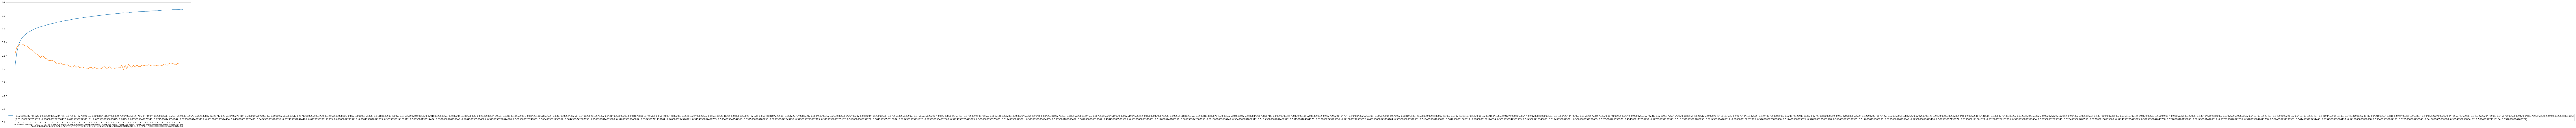

In [ ]:
visualizer(history_obj, 'accuracy')

In [ ]:
early_stopper = EarlyStopping(monitor = 'accuracy', patience= 10)

In [ ]:
history_obj_2 = model.fit(x = X_train, y = y_train, batch_size = 512, epochs = 100,
                            validation_data = (X_test, y_test), validation_batch_size = 512,
                            use_multiprocessing = True, workers = 40, callbacks = early_stopper)

Epoch 1/100
25/25 [==============================] - 0s 6ms/step - loss: 0.1556 - accuracy: 0.9478 - precision: 0.9383 - recall: 0.9588 - val_loss: 1.0996 - val_accuracy: 0.5390 - val_precision: 0.2749 - val_recall: 0.8219
Epoch 2/100
25/25 [==============================] - 0s 5ms/step - loss: 0.1546 - accuracy: 0.9492 - precision: 0.9386 - recall: 0.9613 - val_loss: 1.0985 - val_accuracy: 0.5435 - val_precision: 0.2762 - val_recall: 0.8168
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.1535 - accuracy: 0.9493 - precision: 0.9401 - recall: 0.9597 - val_loss: 1.1756 - val_accuracy: 0.5250 - val_precision: 0.2708 - val_recall: 0.8372
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.1525 - accuracy: 0.9508 - precision: 0.9389 - recall: 0.9644 - val_loss: 1.1127 - val_accuracy: 0.5420 - val_precision: 0.2763 - val_recall: 0.8219
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.1512 - accuracy: 0.9503 - precisi

In [ ]:
def hypermodel(hyp):

  #create a model
  model = tf.keras.Sequential()

  #create input layer
  model.add(tf.keras.layers.Input(shape = (50,)))

  #creat the hidden layer
  for layer_num in range(hyp.Int('Number of layers: ',min_value = 1, max_value =25)):
    model.add(tf.keras.layers.Dense(units = hyp.Int(f'Number of Neurons for layer {layer_num} ', min_value = 4, max_value = 20, step =5),
                                    activation = hyp.Choice(f'activation funtion for layer {layer_num}: ', ['sigmoid','relu']),
                                    kernel_initializer = hyp.Choice(f'Kernal Initialer for layer {layer_num}: ', ['he_normal','he_uniform','glorot_normal','glorot_uniform'])))
    
  #create the output layer
  model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid',
                                  kernel_initializer = hyp.Choice('Kernal Initialer for Output layer: ', ['he_normal','he_uniform','glorot_normal','glorot_uniform'])))
  
  #compile the model
  model.compile(optimizer = 'Adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy','Precision','Recall'])
  
  return model

In [ ]:
tuner =  RandomSearch(hypermodel = hypermodel,
                      objective = 'accuracy')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
Number of layers:  (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 25, 'step': 1, 'sampling': None}
Number of Neurons for layer 0  (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 20, 'step': 5, 'sampling': None}
activation funtion for layer 0:  (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'relu'], 'ordered': False}
Kernal Initialer for layer 0:  (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform', 'glorot_normal', 'glorot_uniform'], 'ordered': False}
Kernal Initialer for Output layer:  (Choice)
{'default': 'he_normal', 'conditions': [], 'values': ['he_normal', 'he_uniform', 'glorot_normal', 'glorot_uniform'], 'ordered': False}


In [ ]:
tuner.search(x=X_train, y=y_train, batch_size=512, epochs=100)

Trial 10 Complete [00h 00m 19s]
accuracy: 0.5014159679412842

Best accuracy So Far: 0.8584015369415283
Total elapsed time: 00h 03m 12s


In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                714       
                                                                 
 dense_1 (Dense)             (None, 19)                285       
                                                                 
 dense_2 (Dense)             (None, 19)                380       
                                                                 
 dense_3 (Dense)             (None, 4)                 80        
                                                                 
 dense_4 (Dense)             (None, 14)                70        
                                                                 
 dense_5 (Dense)             (None, 9)                 135       
                                                                 
 dense_6 (Dense)             (None, 14)                1

In [ ]:
model_weights_dir = 'Weights'
os.makedirs(model_weights_dir, exist_ok=True)

In [ ]:
best_model.save(os.path.join(model_weights_dir, 'Best_model.tf'), save_format='tf')

In [ ]:
loaded_model = tf.keras.models.load_model(os.path.join(model_weights_dir,'Best_model.tf'))

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                714       
                                                                 
 dense_1 (Dense)             (None, 19)                285       
                                                                 
 dense_2 (Dense)             (None, 19)                380       
                                                                 
 dense_3 (Dense)             (None, 4)                 80        
                                                                 
 dense_4 (Dense)             (None, 14)                70        
                                                                 
 dense_5 (Dense)             (None, 9)                 135       
                                                                 
 dense_6 (Dense)             (None, 14)                1

In [ ]:
evaluation = loaded_model.evaluate(x=X_test, y =y_test, batch_size=512)

4/4 [==============================] - 0s 7ms/step - loss: 1.0717 - accuracy: 0.5050 - precision: 0.2691 - recall: 0.8855


In [ ]:
y_predict = loaded_model.predict(X_test)
y_predict

63/63 [==============================] - 0s 2ms/step


array([[0.7750837 ],
       [0.08229511],
       [0.795843  ],
       ...,
       [0.90981156],
       [0.86077493],
       [0.90981156]], dtype=float32)

In [ ]:
y_predict = list(map(int, y_predict>0.5))

In [ ]:
y_predict